#####  Gauss function

Normalisation: 1.0
Normalisation: 1.0
Normalisation: 0.999999426666


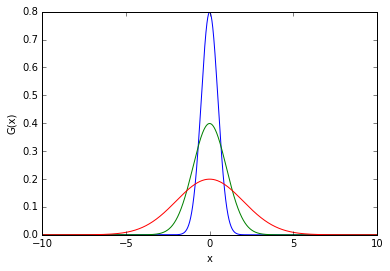

In [127]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# mean mu
mu = 5
dx=0.01
x = np.arange(-10,10,dx)

sigma = 0.5

# definition of norm function in stats package
# stats.norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)


for sigma in [0.5,1,2]:
    plt.plot(x,1./sigma*stats.norm.pdf(x/sigma))
    norm = dx/sigma
    print("Normalisation:", sum(norm*stats.norm.pdf(x/sigma)))

plt.xlabel("x")
plt.ylabel("G(x)")

plt.show()
#label = r"$\lambda =$"+ str(mu)
#plt.gca().figure.text(0.8,0.8,label)

Table of probabilities

In [129]:

nsigma = [1,2,3,4,5]

print("One sided Gaussian tails:")
for  n in nsigma:
    print('{:2.8f}'.format(stats.norm.cdf(n)), 
          "lies below x =",n, "sigma")
    
print("")

print("Two sided Gaussian tails:")
    
for  n in nsigma:
    print('{:2.8f}'.format(2*stats.norm.cdf(n)-1), 
          "lies within", n, "sigma")


One sided Gaussian tails:
0.84134475 lies below x = 1 sigma
0.97724987 lies below x = 2 sigma
0.99865010 lies below x = 3 sigma
0.99996833 lies below x = 4 sigma
0.99999971 lies below x = 5 sigma

Two sided Gaussian tails:
0.68268949 lies within 1 sigma
0.95449974 lies within 2 sigma
0.99730020 lies within 3 sigma
0.99993666 lies within 4 sigma
0.99999943 lies within 5 sigma


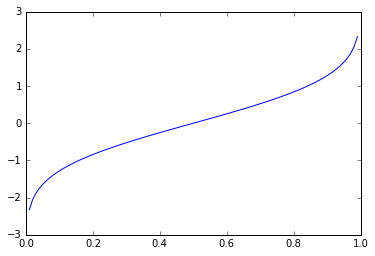

0.683 of the area lies within 1.001 sigma
0.9 of the area lies within 1.645 sigma
0.95 of the area lies within 1.960 sigma
0.99 of the area lies within 2.576 sigma


In [104]:

x = np.arange(0,1,0.01)

#  ppf Percent point function (inverse of cdf — percentiles).
plt.plot(x,stats.norm.ppf(x))
plt.show()
prob = [0.683,0.90,0.95,0.99]

for  p in prob:
    ptwosided=1.-(1-p)/2.   
    print(p,"of the area lies within",'{:2.3f}'
          .format(stats.norm.ppf(ptwosided)),"sigma")


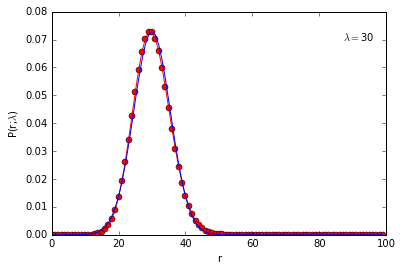

In [122]:
# comparison to Poisson
# mean mu
mu = 30
x=np.arange(0,100)

#plt.plot(x, stats.poisson.pmf(x,mu))
plt.plot(x, stats.poisson.pmf(x,mu),'-ro')

plt.xlabel("r")
plt.ylabel("P(r;$\lambda$)")
label = r"$\lambda =$"+ str(mu)
plt.gca().figure.text(0.8,0.8,label)

xmean=mu
sigma=np.sqrt(mu)
plt.plot(x,1./sigma*stats.norm.pdf((x-xmean)/sigma))



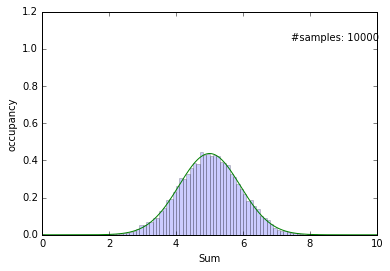

In [134]:
# the central limit theorem
n_sample = 10000
n_tosses = 10

# initializing
ht_sample=[]

for i in range(0, n_sample):
    ht_sample.append(sum(np.random.uniform(0,1,n_tosses)))
  
# plotting the histogram
plt.hist(ht_sample,100,[0.,n_tosses],normed=1,alpha=0.2)

# making the plot more meaningfull
plt.xlabel("Sum")
plt.ylabel("occupancy")
plt.xlim([0.,n_tosses])
plt.ylim([0,1.2])


label = r"#samples: "+ str(n_sample)
plt.gca().figure.text(0.7,0.8,label)

xmean=n_tosses/2.
sigma=np.sqrt(n_tosses/12.)
plt.plot(x,1./sigma*stats.norm.pdf((x-xmean)/sigma))

plt.show()